In [2]:
import numpy as np                                   # Libreria para 
import scipy as sc                                   # Libreria con herramientas y algoritmos matematicos
import matplotlib.pyplot as plt                      # Libreria para graficar
from sklearn.datasets import make_circles            # Libreria para el aprendizaje, de la cual utilizaremos la libreria para hacer circulos

In [3]:
# Creamos una capa neuronal
class CapaNeuronal():
    def __init__(self, numeroConexiones, numeroNeuronas,funcionActivacion):      # Recepción parametros
        self.fActivacion = funcionActivacion                                     # Definición del atributo que contiene la función de activación
        
        self.b = np.random.rand(1,numeroNeuronas) * 2 - 1                        # Sesgo (bias en ingles), con esta operación limitamos el rango de -1 a 1
        self.W = np.random.rand(numeroConexiones,numeroNeuronas) * 2 - 1         # Pesos (valor que representa que tanto influye ese valor)

In [4]:
# Función para crear le neurona, le pasamos la cantidad de neuronas y la función de activación a utilizar (en este caso la sigmoide)
def CrearRedNeuronal(topologia, funcionActivacion):
    
    redNeuronal = []                                                                         # Arreglo que contendra las capas de la red renuronal
    
    for l, layer in enumerate(topologia[:-1]):                                               # realizamos un ciclo obteniendo el indice y el elemento de ese indice
        redNeuronal.append(CapaNeuronal(topologia[l], topologia[l+1], funcionActivacion))    # Agregamos a nuestra red neuronal cada una de las capas

    return redNeuronal

#CrearRedNeuronal(topologiaRed, sigmoide)

In [5]:
#Función para entrenar la neurona
def Entrenar(RedNeuronal, X, Y, FuncionDeCosto, tasaAprendizaje = 0.5, entrenamiento=True):  # funcion de entrenamiento
    
    salida = [(None, X)]
    
    for l, capa in enumerate(redNeuronal):                       # Paso hacia adelante de la neurona, recorremos la red nueronal
        
        z = salida[-1][1] @ RedNeuronal[l].W + RedNeuronal[l].b  #Suma ponderada
        a = RedNeuronal[l].fActivacion[0](z)                     #Activación
    
        salida.append((z,a))
        
    if entrenamiento:                                            # si es entrenamiento
        # paso hace atras (backpropagation)
        deltas = []                                                 
        
        for l in reversed(range(0, len(RedNeuronal))):
            z= salida[l+1][0]
            a= salida[l+1][1]
            
            if l == len(RedNeuronal)-1:
                # Calculo en función al costo
                deltas.insert(0, funcionDeCosto[1](a,Y) * RedNeuronal[l].fActivacion[1](a)) 
            else:
                # Calculo en base a los peso anterio
                deltas.insert(0, deltas[0] @ _W.T * RedNeuronal[l].fActivacion[1](a))
                               
            _W = RedNeuronal[l].W
            
            # Gradiente descendiente
                # Calculo del costo del gradiente en función del parametro de bayas
            RedNeuronal[l].b = RedNeuronal[l].b - np.mean(deltas[0], axis=0, keepdims=True) * tasaAprendizaje
                # Calculo del peso en función de la salida anteior
            RedNeuronal[l].W = RedNeuronal[l].W - salida[l][1].T @ deltas[0] * tasaAprendizaje
        
    return salida[-1][1]
            
#Entrenar(redNeuronal, X, Y, funcionDeCosto, 0.5)

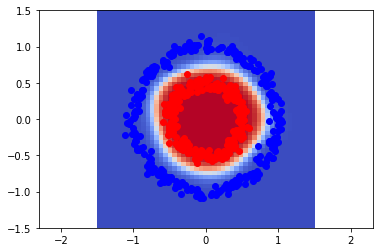

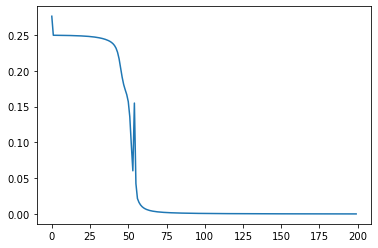

In [14]:
import time 
from IPython.display import clear_output

# Datos a utilizar para nuestra red neuronal
n = 500                                                         # Número de registro
p = 2                                                           # Número de caracteristicas de cada registro, utilizamos 2 para que sea bidimensional la representación en la gráfica
topologiaRed = [p, 4, 8, 4 ,1]                                  # Número de neuronas por capa

X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)  # Genera los valores de los puntos, n=número de puntos, factor=distanciamiento entre los circulos, noise=espaciamiento entre puntos
                                                                # Los valores retornados son X=el valor del punto, Y=indica a que circulo correponde
Y = Y[:, np.newaxis]
                                                                
                                                                
sigmoide = (lambda x: 1 / (1 + np.e ** (-x)),                   # Acá le calculamos la primera derivada a la función sigmoude y retornamos la función de activación y su primera derivada
            lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)                                    # generamos 100 valores de -5 a 5 
#plt.plot(_x, sigmoide[0](_x, ))

funcionDeCosto = (lambda Yp, Yr : np.mean((Yp - Yr) ** 2),      # Función que calcula el costo 
                  lambda Yp, Yr : (Yp - Yr)) 

redNeuronal = CrearRedNeuronal(topologiaRed, sigmoide)          # Llamamos a la función que crea la red neuronal

perdidas = []

for i in range(5000):
  
    #Entrenando la red
    pY = Entrenar(redNeuronal, X, Y, funcionDeCosto, tasaAprendizaje = 0.01)  # llamamos a la función entrenar
    
    if i % 25 == 0:                                                           # Entramos a realizar los calculos cada 25 numero si para el mismo su modulo es 0
        #print(i, pY)
        perdidas.append(funcionDeCosto[0](pY, Y))                             # Calculamos el costo    
        
        res = 50                                                              # utilizaremos 50 para generar 50 numeros en las siguientes funciones entre -1.5 y 1.5
        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)
        
        _Y = np.zeros((res, res))                                             # Creamos un arreglo y lo llenamos con valores cero
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = Entrenar(redNeuronal, np.array([[x0,x1]]), Y, funcionDeCosto, entrenamiento=False)[0][0]
                
        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="blue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="red")
        
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(perdidas)), perdidas)
        plt.show()
        #time.sleep(0.5)